# Comomo analysis :

uSEIR quenched LL-Fit (CCAA) - ana fit results 

Select best fit configuration and plot results

version: 23-06-2020

author : JAH, JJG

In [1]:
import os
import sys
import glob
import time
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue Jun 23 11:44:00 2020


In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 12

In [4]:
npa     = np.array

In [5]:
from c19.useir_comomo_llfit_ana import canames
from c19.useir_comomo_llfit_ana import ca_cases, ana_ca, plot_ana_ca
from c19.useir_comomo_llfit_ana import ana_ccaa, plot_ana_ccaa, plot_ana_ccaa_evo
from c19.useir_comomo_llfit_ana import get_dpars, plot_dpars

In [6]:
ipath = '/Users/hernando/investigacion/bio/c19/data/'
ifile = 'ccaa_8complete.csv'
dfr = get_dpars(ipath + ifile)

### load fit results

fit results for different configurations and CCAA

In [7]:
ipath = '/Users/hernando/investigacion/bio/c19/data/'
confs = ['8complete', '8complete0', '4default', '2default1']

kdpars = {}
for conf in confs:
    ofile = ipath + 'ccaa_' + conf + '.csv'
    kdpars[conf] = get_dpars(ofile)

### compare fit-resuls

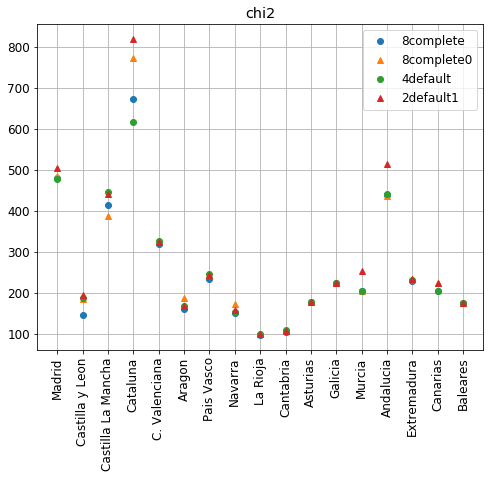

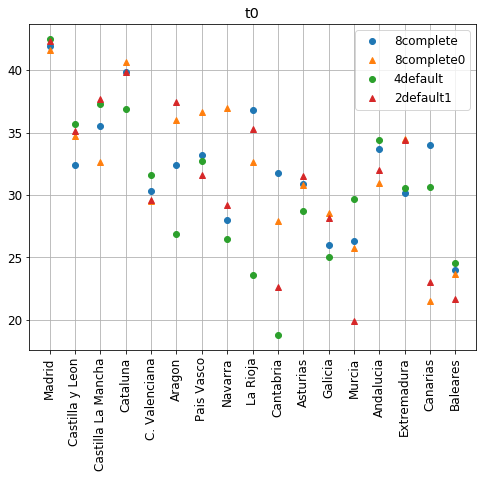

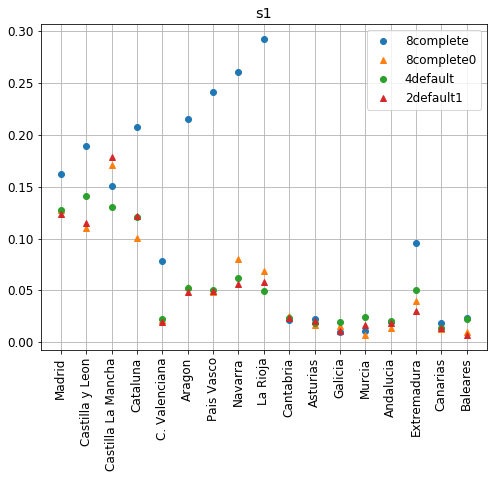

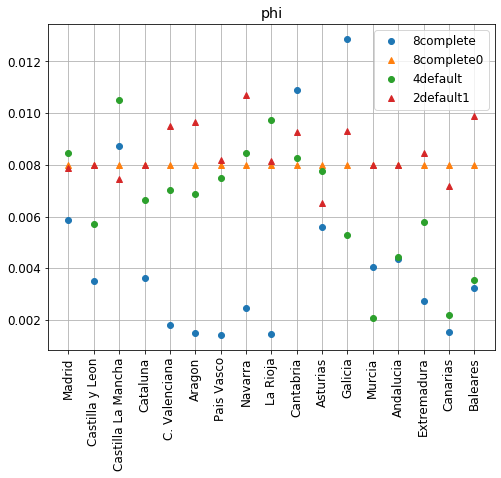

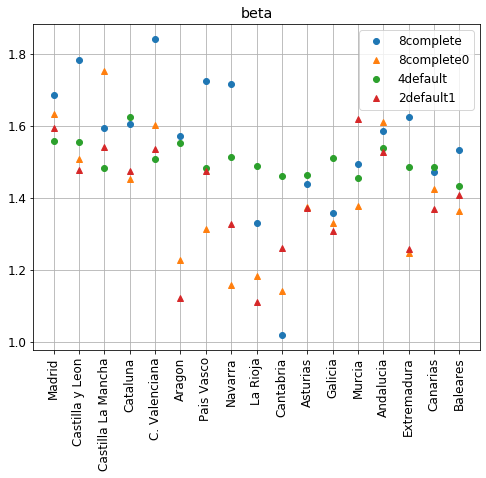

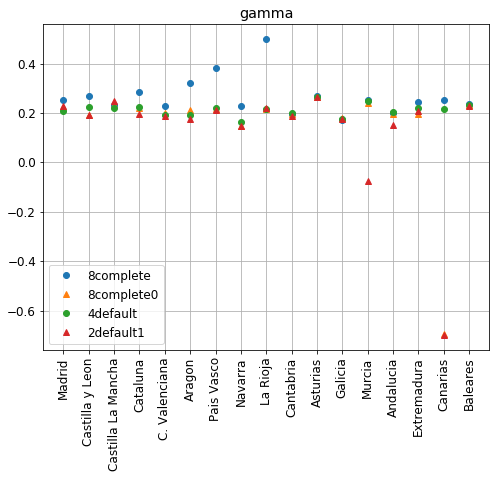

In [8]:
kpars = ['chi2', 't0', 's1', 'phi', 'beta', 'gamma']

keys    = kdpars.keys()
canames = kdpars[keys[0]].kyes() if canames is None else canames
markers = 2 * ('o', '^') #['s', 'o', '^', '*']
for kpar in kpars:
    plt.figure()
    for i, key in enumerate(keys):
        vals = [kdpars[key][caname][kpar][-1] for caname in canames]
        plt.plot(vals, ls = '', marker = markers[i], label = key)
    plt.xticks(np.arange(len(canames)), canames, rotation = 90); plt.grid()
    plt.legend(); plt.title(kpar)

Conclusions:
    
   - complete has problems with several parameters, but gives in general the best chi2
   - defaul gives sensible parameters and good chi2
   - de alternatives to complete or default, are not better
   
   - select default

### Plot default

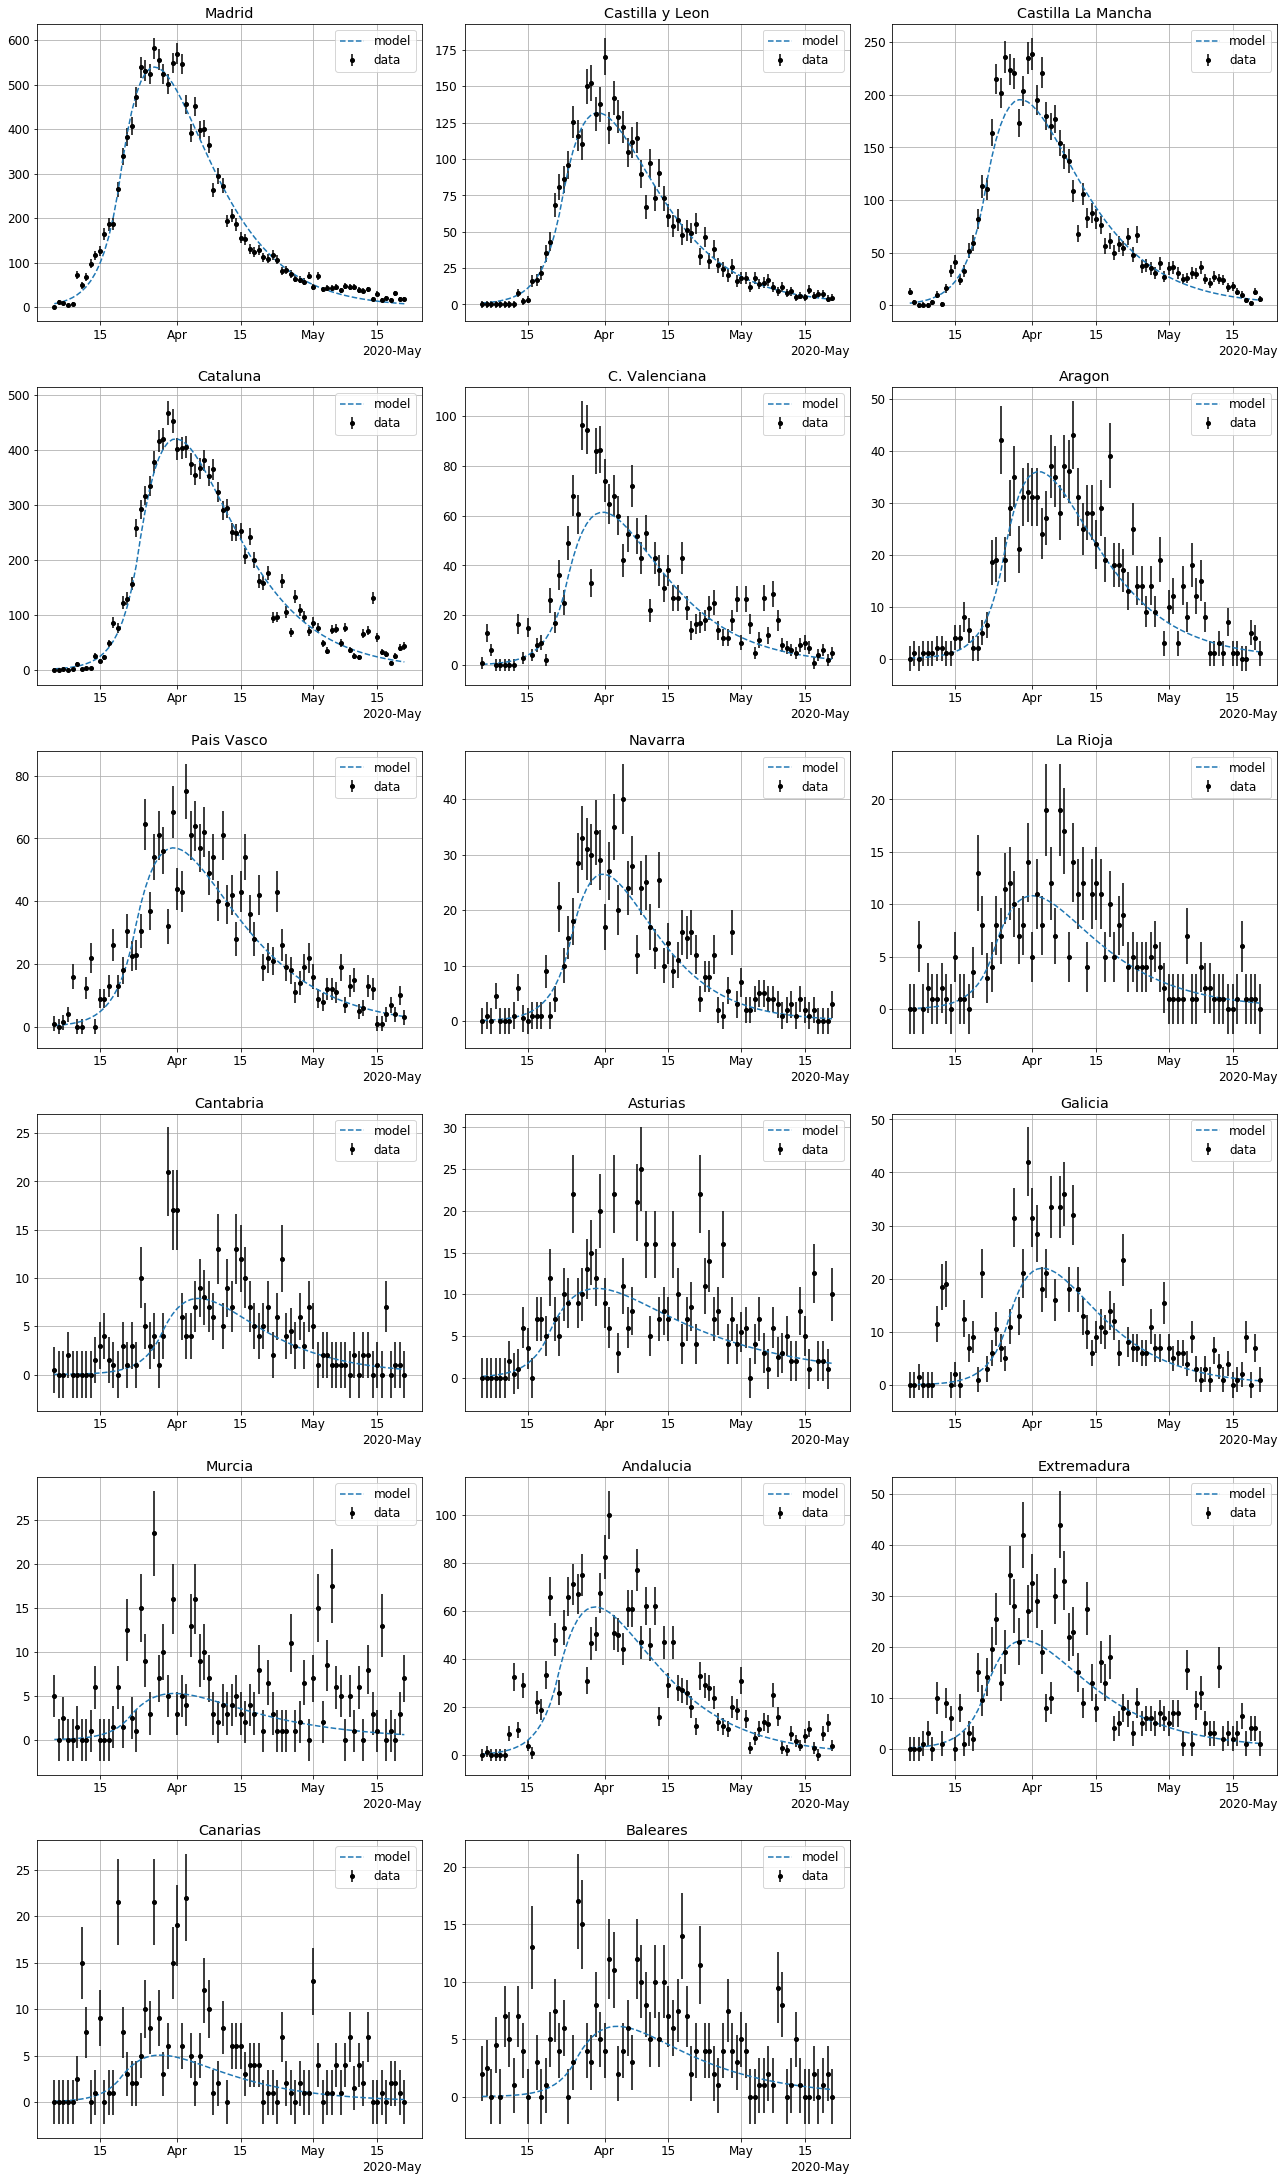

In [9]:
dfr = kdpars['4default']
plot_ana_ccaa(dfr, ncols = 3)

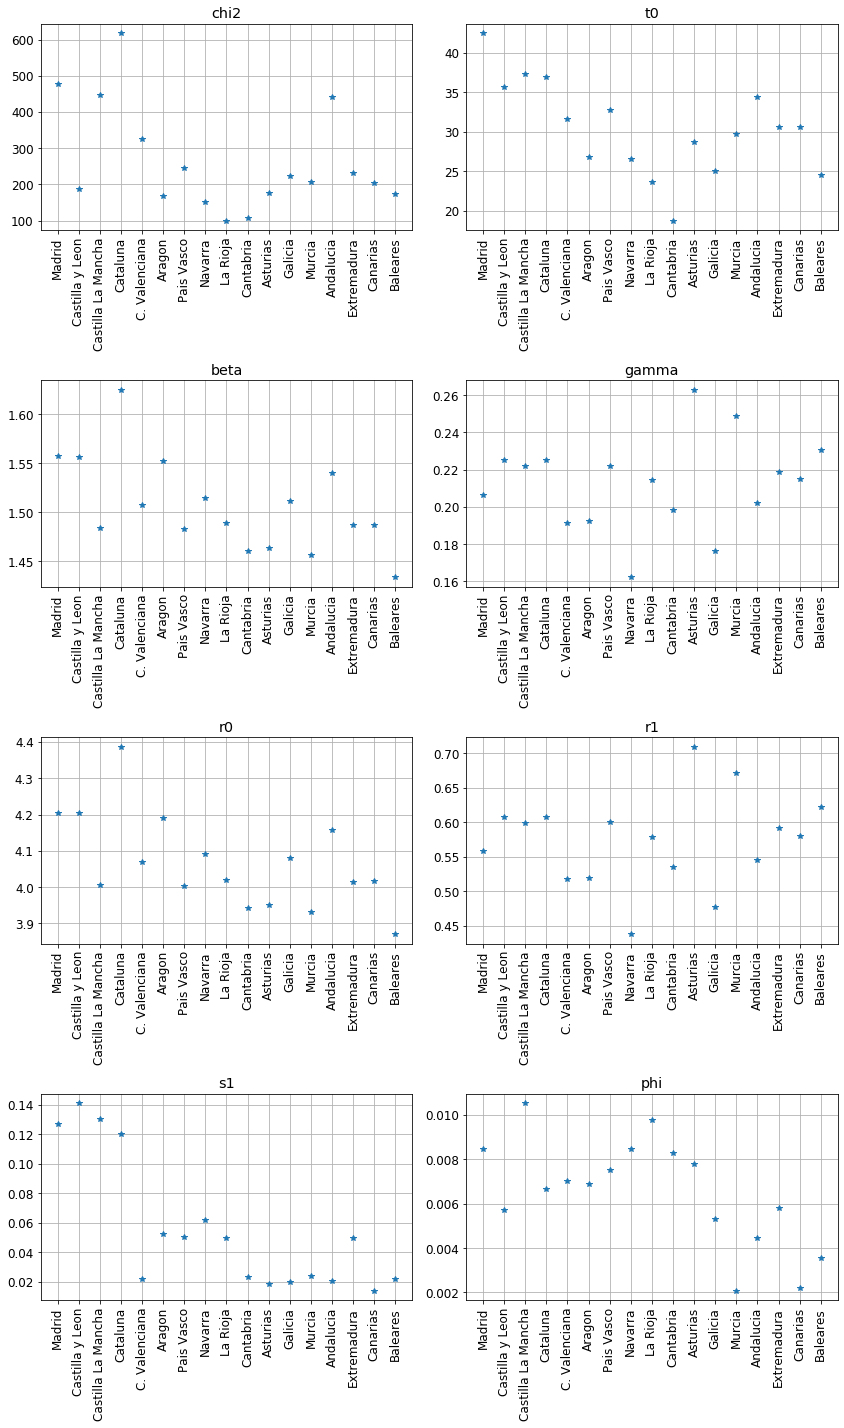

In [10]:
plot_dpars(dfr)

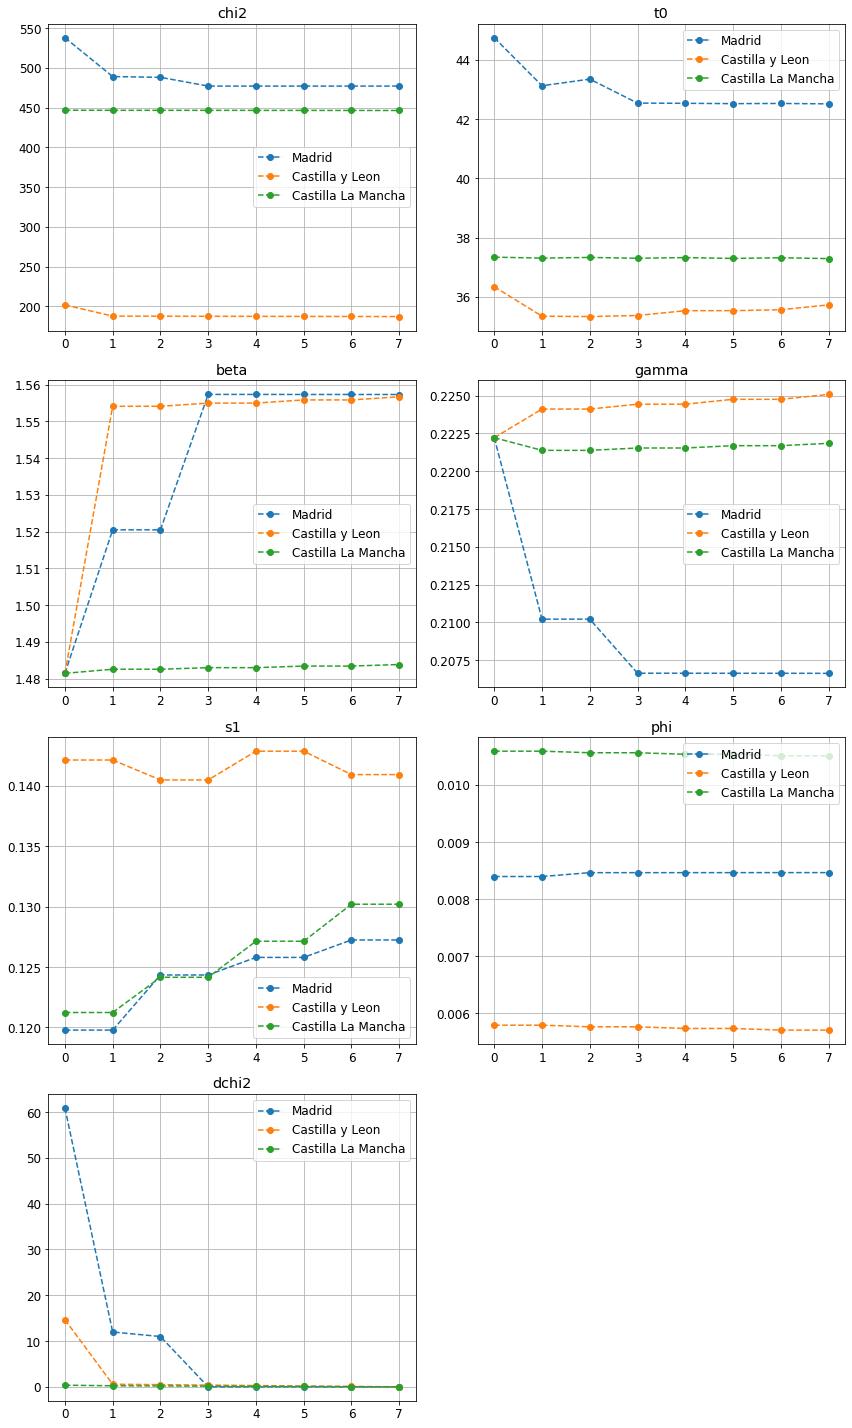

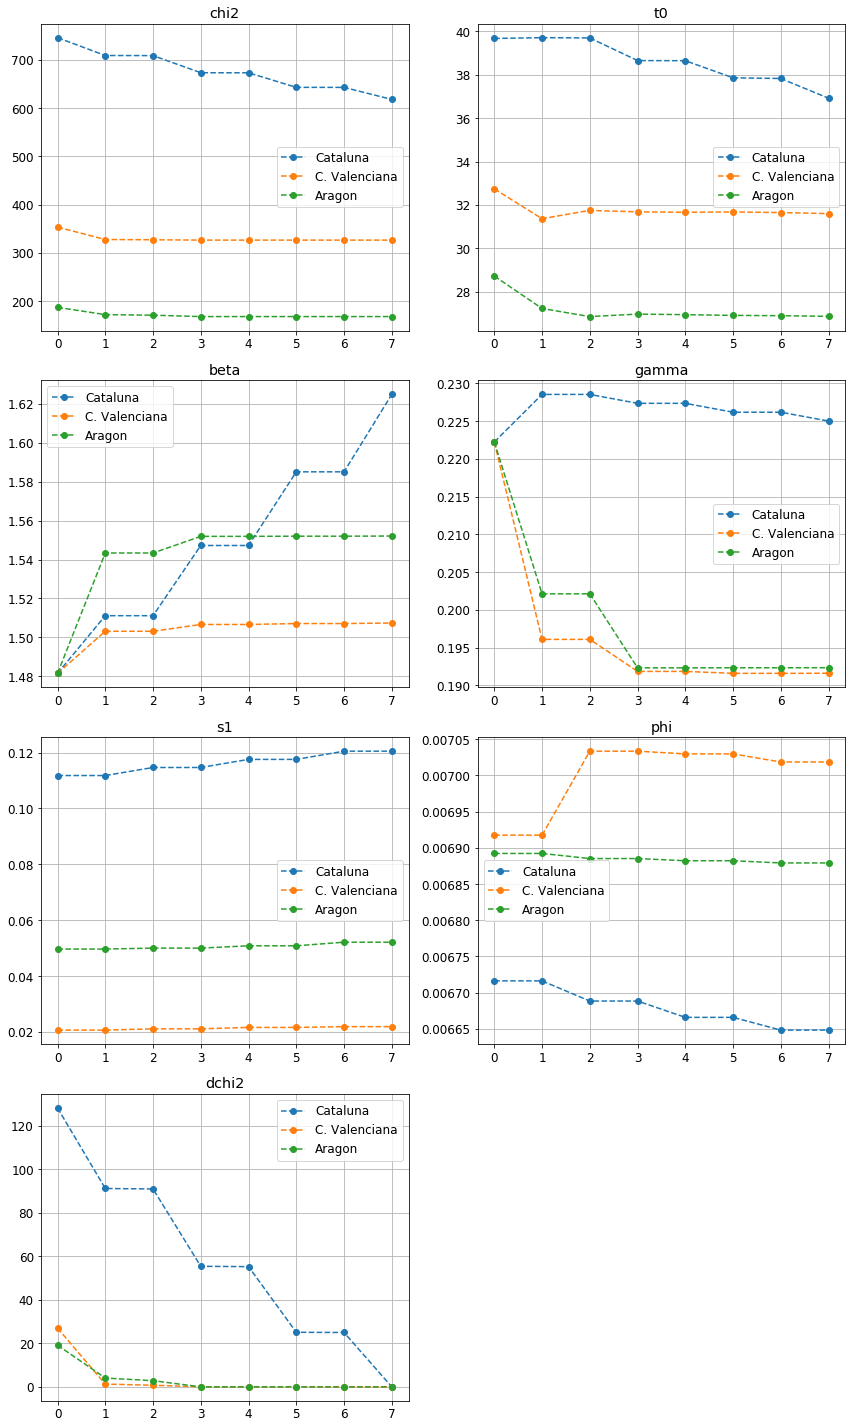

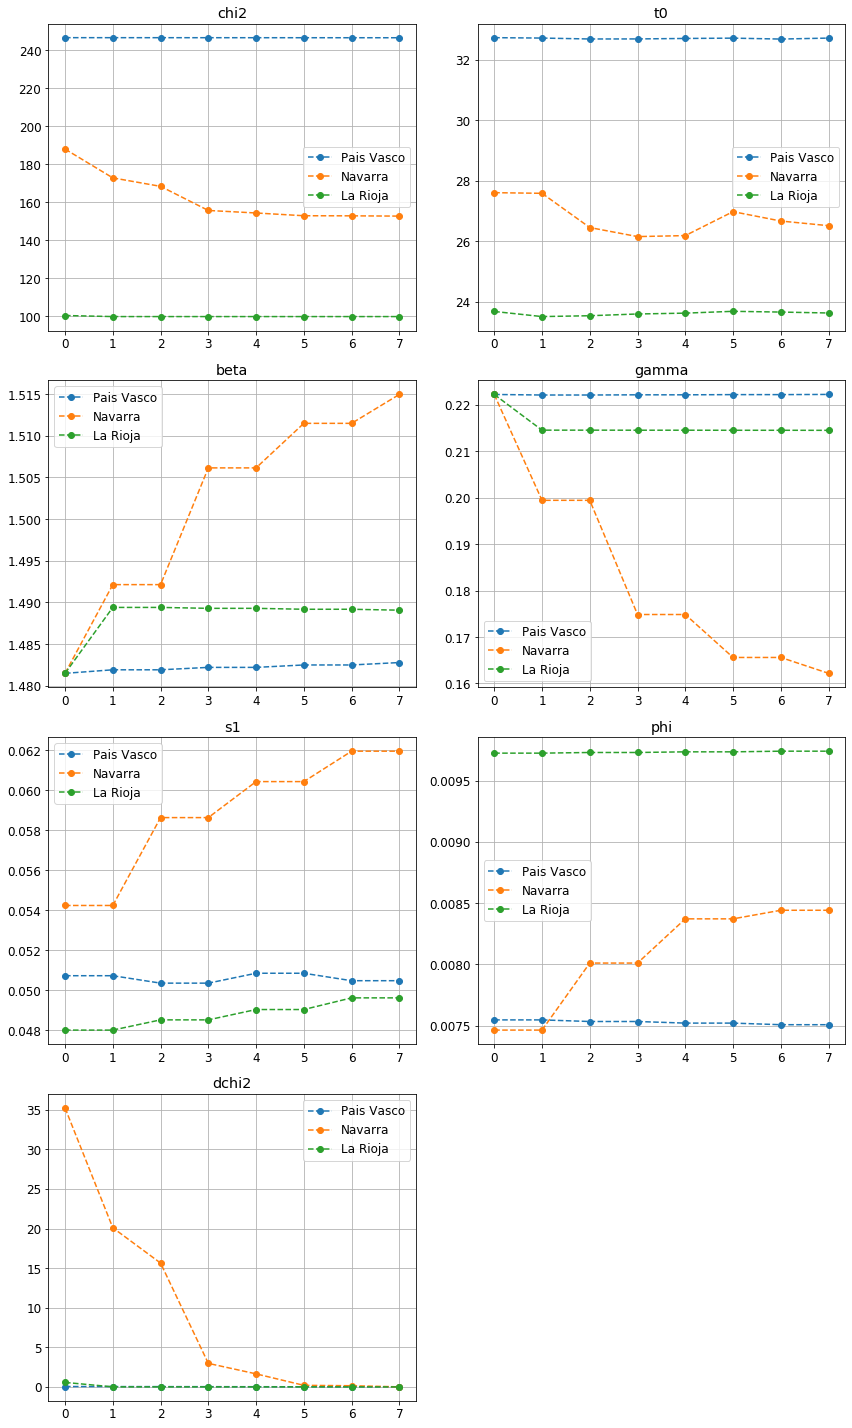

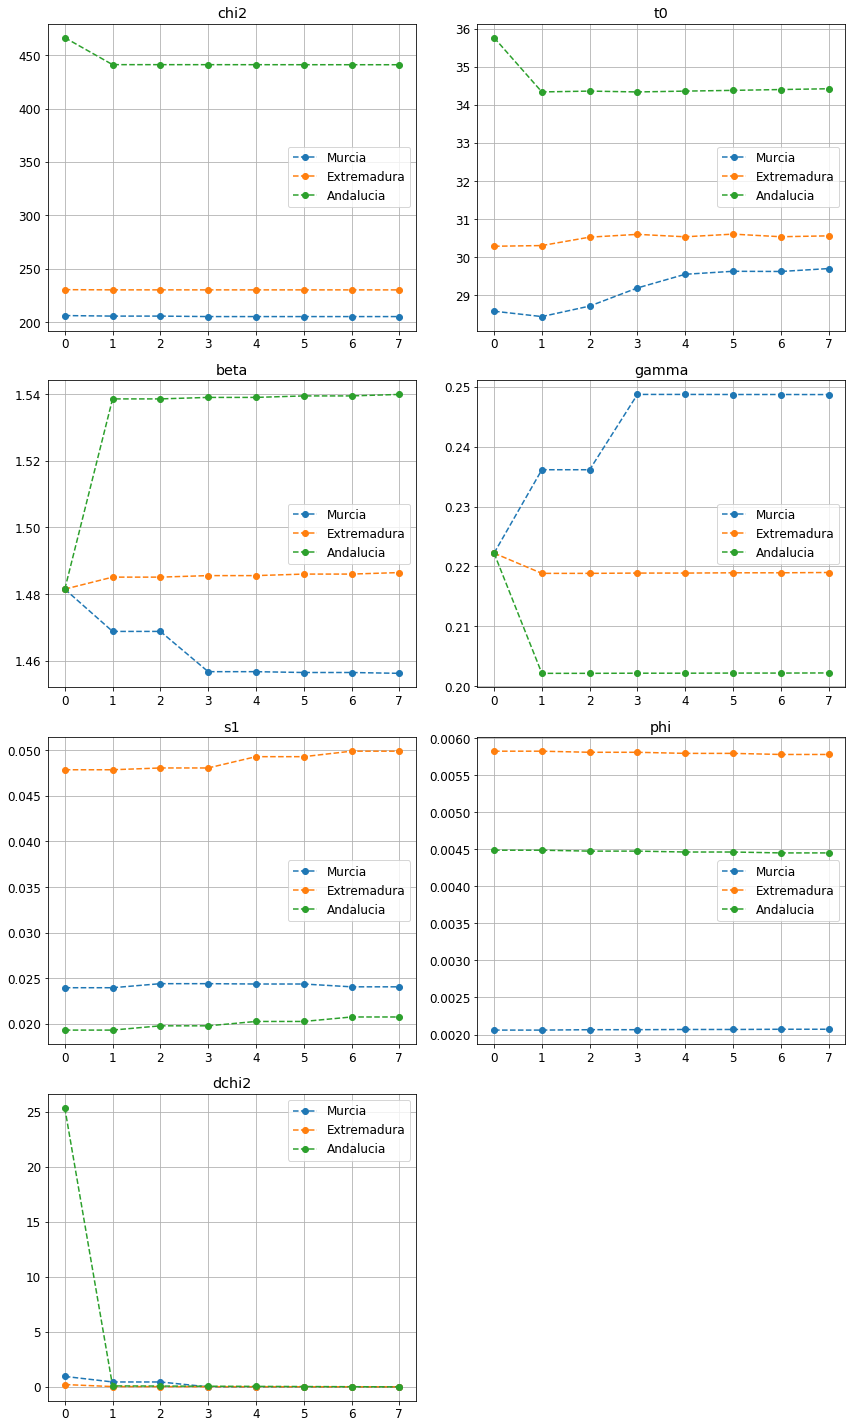

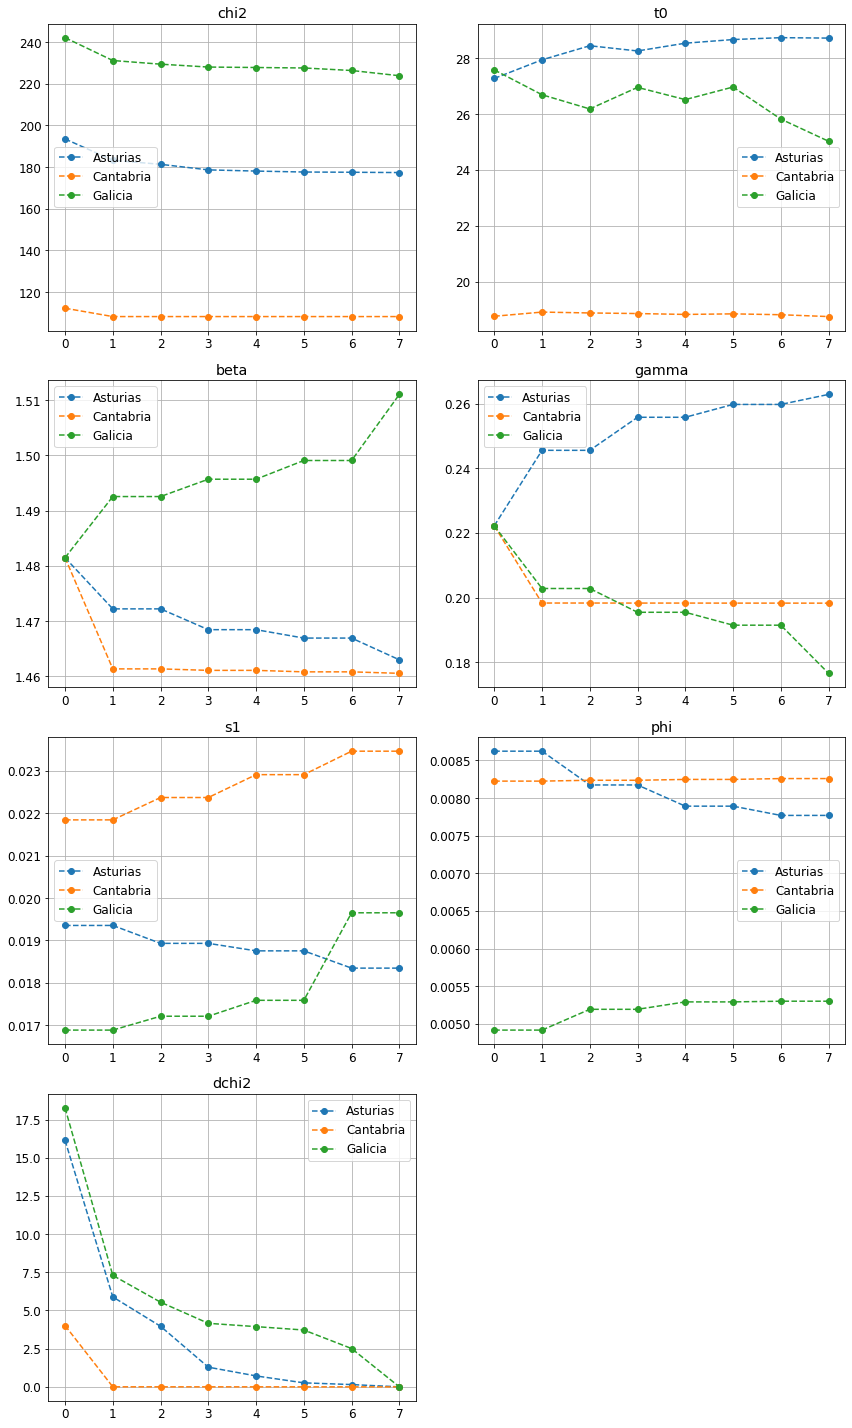

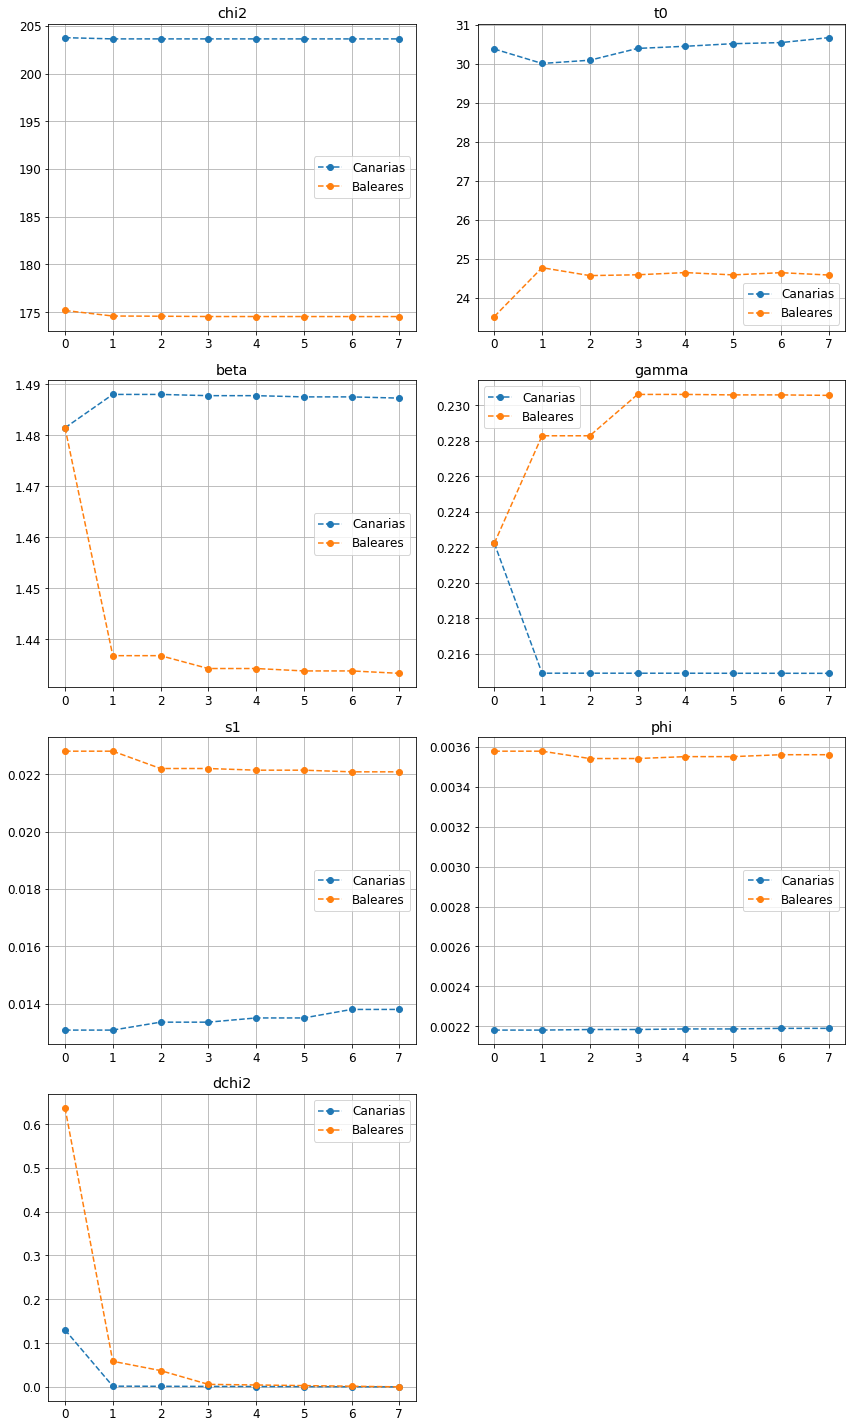

In [11]:
plot_ana_ccaa_evo(dfr, ['Madrid', 'Castilla y Leon', 'Castilla La Mancha'])
plot_ana_ccaa_evo(dfr, ['Cataluna', 'C. Valenciana', 'Aragon'])
plot_ana_ccaa_evo(dfr, ['Pais Vasco', 'Navarra', 'La Rioja'])
plot_ana_ccaa_evo(dfr, ['Murcia', 'Extremadura', 'Andalucia'])
plot_ana_ccaa_evo(dfr, ['Asturias', 'Cantabria', 'Galicia'])
plot_ana_ccaa_evo(dfr, ['Canarias', 'Baleares'])